In [1]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error  # モデル評価用(平均二乗誤差)
from sklearn.model_selection import train_test_split  # データセット分割用
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import matplotlib as mpl
import pandas_datareader.data as web
import warnings  # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
import lightgbm as lgb  # LightGBM
from sklearn import linear_model
import pymc3 as pm
import pandas.util.testing as tm

C:\Users\Handsome\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv("meigara.csv")
bb=[i for i in df["meigara"]]
s=[str(c) + '.JP' for c in bb]


In [4]:
df=pd.read_csv("stock_1301.JP.csv")

In [5]:
df.head(1)

,Date,Open,High,Low,Close,Volume
0,2021-01-07,2990.0,2995.0,2975.0,2989.0,20400


In [6]:
for i in s[1:]:
    try:
        df_new = pd.read_csv("stock_{}.csv".format(str(i)))
        df["{}_Close".format(str(i))]=df_new["Close"]
        print("stock_{}.csv sucess".format(str(i)))
    except:
        print("failed")
        pass

stock_1332.JP.csv sucess
stock_1333.JP.csv sucess
stock_1352.JP.csv sucess
stock_1376.JP.csv sucess
stock_1377.JP.csv sucess
stock_1379.JP.csv sucess
stock_1384.JP.csv sucess
stock_1413.JP.csv sucess
stock_1414.JP.csv sucess
stock_1417.JP.csv sucess
stock_1419.JP.csv sucess
stock_1420.JP.csv sucess
stock_1429.JP.csv sucess
stock_1430.JP.csv sucess
stock_1433.JP.csv sucess
stock_1435.JP.csv sucess
stock_1446.JP.csv sucess
stock_1448.JP.csv sucess
stock_1514.JP.csv sucess
stock_1515.JP.csv sucess
stock_1518.JP.csv sucess
stock_1605.JP.csv sucess
stock_1662.JP.csv sucess
stock_1663.JP.csv sucess
stock_1712.JP.csv sucess
stock_1716.JP.csv sucess
stock_1717.JP.csv sucess
stock_1719.JP.csv sucess
stock_1720.JP.csv sucess
stock_1721.JP.csv sucess
stock_1726.JP.csv sucess
stock_1762.JP.csv sucess
stock_1766.JP.csv sucess
stock_1768.JP.csv sucess
stock_1780.JP.csv sucess
stock_1801.JP.csv sucess
stock_1802.JP.csv sucess
stock_1803.JP.csv sucess
stock_1805.JP.csv sucess
stock_1808.JP.csv sucess


failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

In [7]:
df.head(1)

,Date,Open,High,Low,Close,Volume,1332.JP_Close,1333.JP_Close,1352.JP_Close,1376.JP_Close,...,3662.JP_Close,3665.JP_Close,3666.JP_Close,3667.JP_Close,3668.JP_Close,3672.JP_Close,3673.JP_Close,3675.JP_Close,3676.JP_Close,3677.JP_Close
0,2021-01-07,2990.0,2995.0,2975.0,2989.0,20400,428.0,2219.0,1012.0,1579.0,...,1108.0,1227.0,679.0,435.0,969.0,391.0,663.0,373.0,1231.0,1095.0


In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df2 = df.set_index(df["Date"])
df1 = df2.drop(["Open", "High", "Low", "Volume", "Date"], axis=1)
df1 = df1.astype("float32")

In [9]:
df1.dtypes

Close            float32
1332.JP_Close    float32
1333.JP_Close    float32
1352.JP_Close    float32
1376.JP_Close    float32
                  ...   
3672.JP_Close    float32
3673.JP_Close    float32
3675.JP_Close    float32
3676.JP_Close    float32
3677.JP_Close    float32
Length: 500, dtype: object

In [14]:
import pymc3 as pm
from pymc3 import *
import os  
os.environ['THEANO_FLAGS'] = "device=gpu0"  
import theano 
N: int = len(df1.columns)
theano.config.floatX = "float32"
theano.config.compute_test_value = "raise"
theano.config.exception_verbosity = "high"
print(theano.config
     )

floatX (('float64', 'float32', 'float16')) 
    Doc:  Default floating-point precision for python casts.

Note: float16 support is experimental, use at your own risk.
    Value:  float32

warn_float64 (('ignore', 'warn', 'raise', 'pdb')) 
    Doc:  Do an action when a tensor variable with float64 dtype is created. They can't be run on the GPU with the current(old) gpu back-end and are slow with gamer GPUs.
    Value:  ignore

pickle_test_value (<function BoolParam.<locals>.booltype at 0x0000017F64CD5438>) 
    Doc:  Dump test values while pickling model. If True, test values will be dumped with model.
    Value:  True

cast_policy (('custom', 'numpy+floatX')) 
    Doc:  Rules for implicit type casting
    Value:  custom

int_division (('int', 'raise', 'floatX')) 
    Doc:  What to do when one computes x / y, where both x and y are of integer types
    Value:  int

deterministic (('default', 'more')) 
    Doc:  If `more`, sometimes we will select some implementation that are more determ

Text(0, 0.5, 'up_rate')

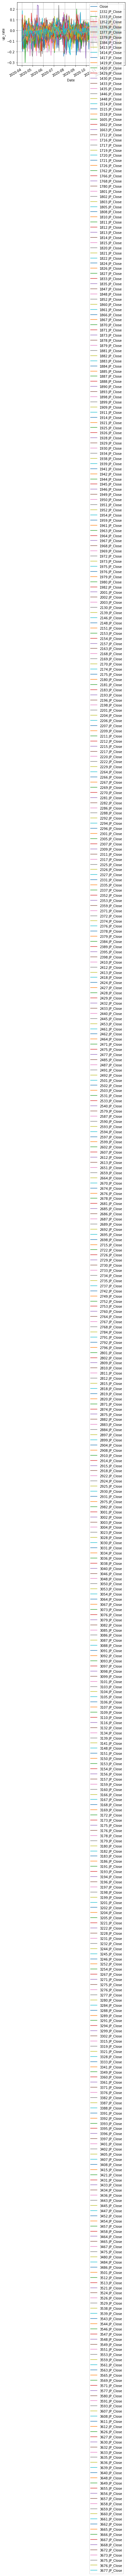

In [14]:
up_rate = df1.diff(axis=0) / df1
up_rate.dropna(inplace=True)
up_rate.plot(grid=True)
plt.ylabel('up_rate')

In [15]:
up_rate.dtypes

Close            float32
1332.JP_Close    float32
1333.JP_Close    float32
1352.JP_Close    float32
1376.JP_Close    float32
                  ...   
3672.JP_Close    float32
3673.JP_Close    float32
3675.JP_Close    float32
3676.JP_Close    float32
3677.JP_Close    float32
Length: 500, dtype: object

Text(0, 0.5, 'Return of $1 on first date, x100%')

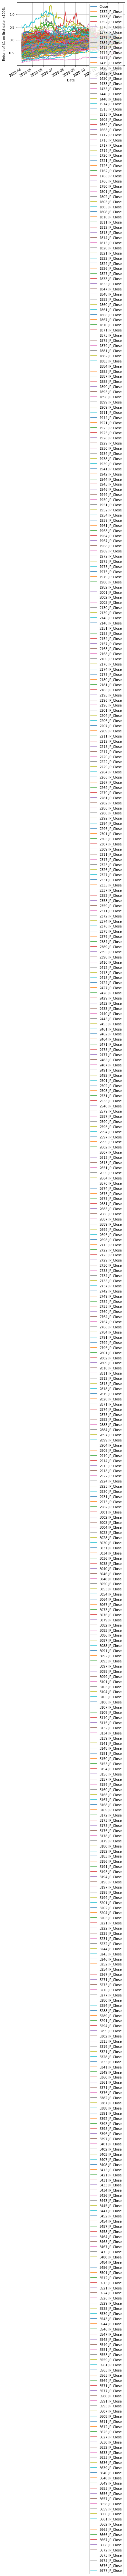

In [16]:
prod = (1 + up_rate).cumprod(axis=0) - 1
prod.plot(grid=True)
plt.ylabel('Return of $1 on first date, x100%')

In [18]:
with pm.Model() as model:
    # LKJCholeskyCovは下三角行列の要素をリストで返す
    packed_L = pm.LKJCholeskyCov(
        "packed_L", n=N, eta=1., sd_dist=pm.HalfCauchy.dist(beta=2.5))
    # 下三角行列に変換する
    L = pm.expand_packed_triangular(N, packed_L, lower=True)
    # 共分散行列にする
    sigma = pm.Deterministic('sigma', L.dot(L.T))

    prior_mu = pm.Uniform("prior_mu", -1, 1, shape=N)
    mu = pm.Normal("returns", mu=prior_mu, sd=1, shape=N)

    obs = pm.MvNormal("observed_returns", mu=mu, chol=L, observed=up_rate)
    step = pm.NUTS()
    trace = pm.sample(1000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [returns, prior_mu, packed_L]


RuntimeError: The communication pipe between the main process and its spawned children is broken.
In Windows OS, this usually means that the child process raised an exception while it was being spawned, before it was setup to communicate to the main process.
The exceptions raised by the child process while spawning cannot be caught or handled from the main process, and when running from an IPython or jupyter notebook interactive kernel, the child's exception and traceback appears to be lost.
A known way to see the child's error, and try to fix or handle it, is to run the problematic code as a batch script from a system's Command Prompt. The child's exception will be printed to the Command Promt's stderr, and it should be visible above this error and traceback.
Note that if running a jupyter notebook that was invoked from a Command Prompt, the child's exception should have been printed to the Command Prompt on which the notebook is running.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F97F358848>,
      dtype=object)

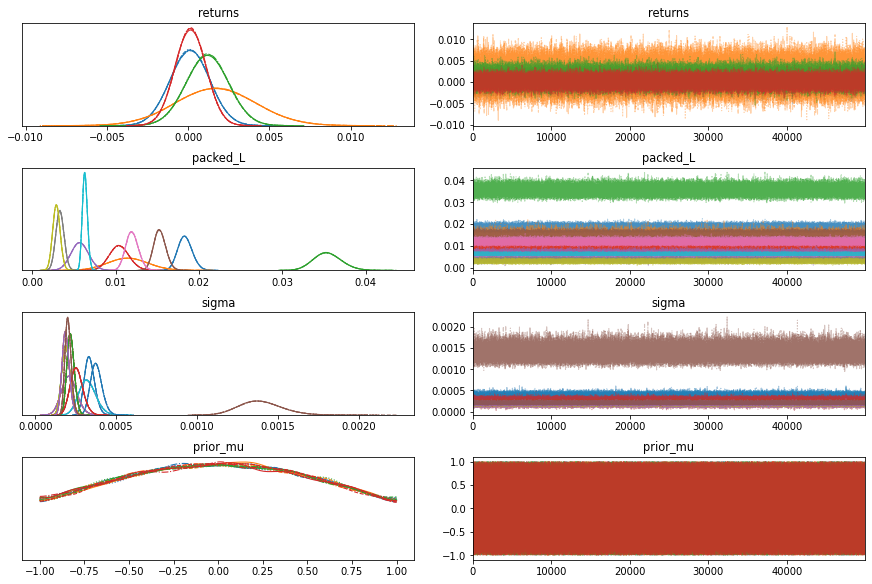

In [69]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F97ED44488>],
      dtype=object)

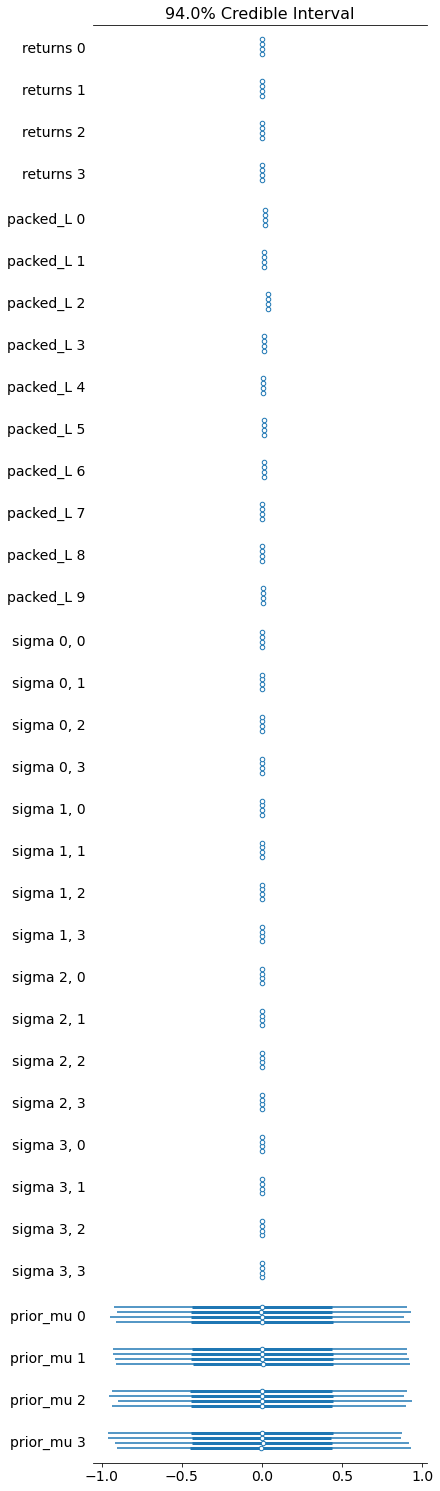

In [70]:
pm.forestplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F97ED25FC8>,
      dtype=object)

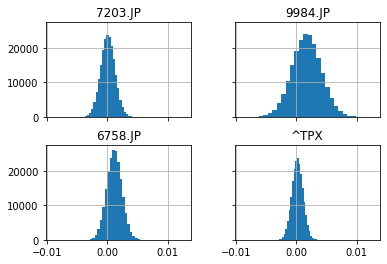

In [71]:
mu_samples = pd.DataFrame(trace['returns'],
                          columns=s)
mu_samples.hist(bins=30, sharex=True, sharey=True)

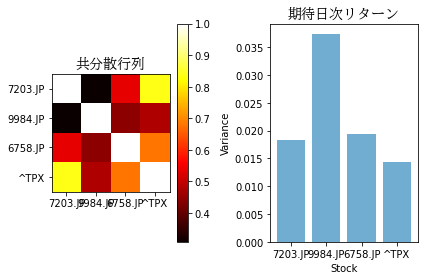

In [72]:
sigma_post = trace["sigma"].mean(axis=0)
fp = mpl.font_manager.FontProperties(
    fname="C://Windows//Fonts//BIZ-UDMinchoM.ttc", size=14)
fp1 = mpl.font_manager.FontProperties(
    fname="C://Windows//Fonts//BIZ-UDMinchoM.ttc", size=8)

# 共分散行列から相関行列にする関数
def cov2corr(A):
    d = np.sqrt(A.diagonal())
    A = ((A.T / d).T) / d
    return A

plt.subplot(1, 2, 1)
plt.imshow(cov2corr(sigma_post), interpolation="none", cmap=plt.cm.hot)

plt.xticks(np.arange(4), up_rate.columns)
plt.yticks(np.arange(4), up_rate.columns)
plt.colorbar(orientation="vertical")
plt.title("共分散行列",fontproperties=fp)

plt.subplot(1, 2, 2)
plt.bar(np.arange(4), np.sqrt(np.diag(sigma_post)),
        color="#348ABD",
        alpha=0.7)
plt.xticks(np.arange(4), up_rate.columns)
plt.title("期待日次リターン",fontproperties=fp)
plt.xlabel('Stock')
plt.ylabel('Variance')

plt.tight_layout()

In [73]:
pm.gelman_rubin(trace)

<xarray.Dataset>
Dimensions:         (packed_L_dim_0: 10, prior_mu_dim_0: 4, returns_dim_0: 4, sigma_dim_0: 4, sigma_dim_1: 4)
Coordinates:
  * returns_dim_0   (returns_dim_0) int32 0 1 2 3
  * packed_L_dim_0  (packed_L_dim_0) int32 0 1 2 3 4 5 6 7 8 9
  * sigma_dim_0     (sigma_dim_0) int32 0 1 2 3
  * sigma_dim_1     (sigma_dim_1) int32 0 1 2 3
  * prior_mu_dim_0  (prior_mu_dim_0) int32 0 1 2 3
Data variables:
    returns         (returns_dim_0) float64 1.0 1.0 1.0 1.0
    packed_L        (packed_L_dim_0) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    sigma           (sigma_dim_0, sigma_dim_1) float64 1.0 1.0 1.0 ... 1.0 1.0
    prior_mu        (prior_mu_dim_0) float64 1.0 1.0 1.0 1.0

In [74]:
prod

Symbols,7203.JP,9984.JP,6758.JP,^TPX
Date,,,,
2020-01-07,0.019443,0.016573,0.030700,0.015976
2020-01-08,0.006326,0.002599,0.031373,0.001854
2020-01-09,0.013281,0.047326,0.050403,0.017875
2020-01-10,0.012090,0.064717,0.055626,0.021459
2020-01-14,0.022291,0.100777,0.080979,0.024611
...,...,...,...,...
2020-12-24,-0.038746,0.257085,0.248218,-0.004358
2020-12-25,-0.033069,0.216229,0.231037,-0.002040
2020-12-28,-0.019725,0.218438,0.258487,0.003334


In [75]:
with model:
    post_pred = pm.sample_posterior_predictive(trace, samples=1000)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1659.39it/s]


In [76]:
post_pred["observed_returns"].mean(axis=0)

array([0.00022156, 0.00219724, 0.00157194, 0.00047128])

In [3]:
senkou = [1076.9, 1072.4, 1040.6, 1008.8, 967.9, 936.1, 958.8, 1008.8, 1058.8, 1108.8]
getu=["2020-0"+str(i) for i in range(1,10) ]
getu.append("2020-10")

In [6]:
aa=zip(getu,senkou)

In [7]:
aa

In [5]:
with open("stockjp.txt",mode="r") as f:
    aa=f.read()

In [7]:
import pandas as pd

df=pd.read_csv("meigara.csv")

In [28]:
bb=[i for i in df["meigara"]]

In [29]:
bb

[1301,
 1332,
 1333,
 1352,
 1376,
 1377,
 1379,
 1384,
 1413,
 1414,
 1417,
 1419,
 1420,
 1429,
 1430,
 1433,
 1435,
 1446,
 1448,
 1514,
 1515,
 1518,
 1605,
 1662,
 1663,
 1712,
 1716,
 1717,
 1719,
 1720,
 1721,
 1726,
 1762,
 1766,
 1768,
 1780,
 1801,
 1802,
 1803,
 1805,
 1808,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1820,
 1821,
 1822,
 1824,
 1826,
 1827,
 1833,
 1835,
 1847,
 1848,
 1852,
 1860,
 1861,
 1866,
 1867,
 1870,
 1871,
 1873,
 1878,
 1879,
 1881,
 1882,
 1883,
 1884,
 1885,
 1887,
 1888,
 1890,
 1893,
 1898,
 1899,
 1909,
 1911,
 1914,
 1921,
 1925,
 1926,
 1928,
 1929,
 1930,
 1934,
 1938,
 1939,
 1941,
 1942,
 1944,
 1945,
 1946,
 1949,
 1950,
 1951,
 1952,
 1954,
 1959,
 1961,
 1963,
 1964,
 1967,
 1968,
 1969,
 1972,
 1973,
 1975,
 1976,
 1979,
 1980,
 1982,
 2001,
 2002,
 2003,
 2004,
 2009,
 2053,
 2060,
 2107,
 2108,
 2109,
 2112,
 2117,
 2120,
 2121,
 2124,
 2127,
 2130,
 2139,
 2146,
 2148,
 2151,
 2153,
 2154,
 2157,
 2163,
 2168,
 2169,
 2170,
 2174,